In [25]:
import json
import matplotlib.pyplot as plt
import numpy as np

with open("/home/msaad/workspace/honors-thesis/evaluate/eval_results.json", "r") as f:
    eval_results = json.load(f)


In [26]:
# Initialize data structures to store scores
scores_by_type = {}
scores_by_model = {"Categorized": [], "Traditional": [], "Finetuned": [], "Scratch": []}

# Process JSON data
for question, details in eval_results.items():
    question_type = details["Type"]
    
    if question_type not in scores_by_type:
        scores_by_type[question_type] = {"Categorized": [], "Traditional": [], "Finetuned": [], "Scratch": []}
    
    for model, data in details.items():
        if model not in ["Type", "Categorized", "Traditional", "Finetuned", "Scratch"]:
            continue
        
        # Extract the score value and convert to int
        try:
            score_value = int(data[0])
        except ValueError:
            continue

        scores_by_model[model].append(score_value)
        scores_by_type[question_type][model].append(score_value)

# Calculate averages
average_scores_by_model = {model: sum(scores) / len(scores) for model, scores in scores_by_model.items()}
average_scores_by_type = {
    question_type: {model: sum(scores) / len(scores) for model, scores in models.items()}
    for question_type, models in scores_by_type.items()
}

average_scores_by_model, average_scores_by_type


({'Categorized': 4.444444444444445,
  'Traditional': 3.7777777777777777,
  'Finetuned': 6.0,
  'Scratch': 3.2222222222222223},
 {'Admissions': {'Categorized': 8.0,
   'Traditional': 5.0,
   'Finetuned': 4.5,
   'Scratch': 3.0},
  'Financial Aid': {'Categorized': 5.0,
   'Traditional': 4.0,
   'Finetuned': 6.5,
   'Scratch': 3.5},
  'Academic': {'Categorized': 2.8,
   'Traditional': 3.2,
   'Finetuned': 6.4,
   'Scratch': 3.2}})

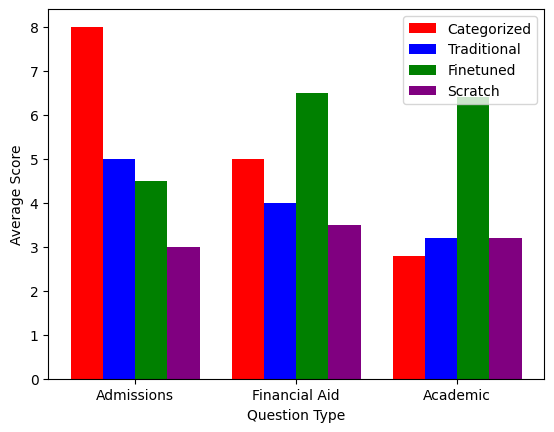

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Your code for preparing data
question_types = average_scores_by_type.keys()
methods = average_scores_by_model.keys()
scores = np.array([[average_scores_by_type[question_type][method] for method in methods] for question_type in question_types])

x = np.arange(len(question_types))
width = 0.2

# Create the plot
fig, ax = plt.subplots()

# Define custom colors for bars
custom_colors = ['red', 'blue', 'green', 'purple']

# Plot the bars with custom colors
for i, (method, color) in enumerate(zip(methods, custom_colors)):
    ax.bar(x + i * width, scores[:, i], width, label=method, color=color)

# Add labels and legend
ax.set_xticks(x + width * 1.5)
ax.set_xticklabels(question_types)
ax.set_xlabel('Question Type')
ax.set_ylabel('Average Score')
ax.legend()

# Show the plot
plt.show()
